### Installing required libraries

In [ ]:
!pip install nixtla numpy scikit-learn matplotlib pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00


Importing libraries

In [ ]:
import numpy as np
import pandas as pd
from nixtla import NixtlaClient
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

Create calculate error metrics function which helps in assessing the performance of the trained model

In [ ]:

def calculate_error_metrics(actual, predicted, num_predictors=1):
    # convert inputs are numpy arrays
    actual = np.array(actual)
    predicted = np.array(predicted)
    # Number of observations
    n = len(actual)
    # Calculate MSE
    mse = mean_squared_error(actual, predicted)
    # Calculate RMSE
    rmse = np.sqrt(mse)
    # Calculate MAPE
    mape = mean_absolute_percentage_error(actual, predicted)
    # Calculate R-squared
    r2 = r2_score(actual, predicted)
    # Calculate Adjusted R-squared
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - num_predictors - 1))
    print(f'MSE : {mse}')
    print(f'RMSE : {rmse}')
    print(f'MAPE : {mape}')
    print(f'r2 : {r2}')
    print(f'adjusted_r2 : {adjusted_r2}')

Setting up your API key

Copy and paste your key directly into your Python code



In [ ]:
from google.colab import userdata

Nixtla_API_KEY = userdata.get('NIXTLA_API')

nixtla_client = NixtlaClient(
    api_key = Nixtla_API_KEY
)

Validate your API key

check the status of your API key, use the validate_api_key method of the NixtlaClient class. This method will return True if the API key is valid and False otherwise.

In [ ]:
nixtla_client.validate_api_key()

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/CV ERA CATUR INTELIGENSIA/trainings/cloud n genAI/codes/Data-Analytics-with-GenAI/Module_3
%pwd

Mounted at /content/drive
/content/drive/MyDrive/CV ERA CATUR INTELIGENSIA/trainings/cloud n genAI/codes/Data-Analytics-with-GenAI/Module_3


'/content/drive/MyDrive/CV ERA CATUR INTELIGENSIA/trainings/cloud n genAI/codes/Data-Analytics-with-GenAI/Module_3'

Load **AirPassenger** data set

Split data into **train** and **test**

In [ ]:
# To load local csv  > modify to the right path where the file is present
Y_df = pd.read_csv('./data/AirPassengersDataset.csv')
Y_df.drop(['unique_id'], axis =1 , inplace = True)
Y_df = Y_df.reset_index(drop=True)
Y_train_df = Y_df[Y_df.ds<='1959-12-31'] # 132 train
Y_test_df = Y_df[Y_df.ds>'1959-12-31']   # 12 test

In [ ]:
Y_df

,ds,y
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121
...,...,...
139,1960-08-31,606
140,1960-09-30,508
141,1960-10-31,461
142,1960-11-30,390


Plot training data

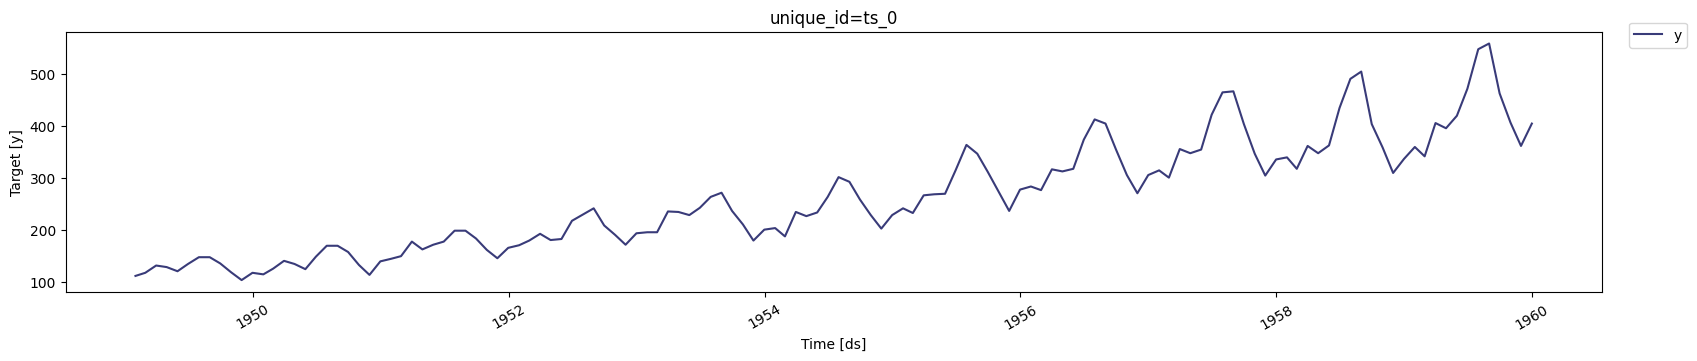

In [ ]:
nixtla_client.plot(Y_train_df, time_col='ds', target_col='y')

Forecast a longer horizon into the future
Next, forecast the next 12 months using the SDK forecast method. Set the following parameters:


1. df: A pandas DataFrame containing the time series data.
2. h: Horizons is the number of steps ahead to forecast.
3. freq: The frequency of the time series in Pandas format. See pandas’ available frequencies. (If you don’t provide any frequency, the SDK will try to infer it)
4. time_col: The column that identifies the datestamp.
5. target_col: The variable to forecast.



In [ ]:
timegpt_fcst_df = pd.DataFrame(nixtla_client.forecast(df=Y_train_df, h=12, time_col='ds', target_col='y'))
timegpt_fcst_df.head()

,ds,TimeGPT
0,1960-01-31,414.51428
1,1960-02-29,403.24426
2,1960-03-31,443.12720
3,1960-04-30,439.75092
4,1960-05-31,462.83655


In [ ]:
timegpt_fcst_df['ds']=timegpt_fcst_df['ds'].astype(str)


Check how good model works on test data

In [ ]:
calculate_error_metrics(Y_test_df[['y']],timegpt_fcst_df['TimeGPT'])

MSE : 213.9357711650168
RMSE : 14.626543377196706
MAPE : 0.026964465118482706
r2 : 0.9613797555827089
adjusted_r2 : 0.9575177311409798


Plot Actual vs Predicted

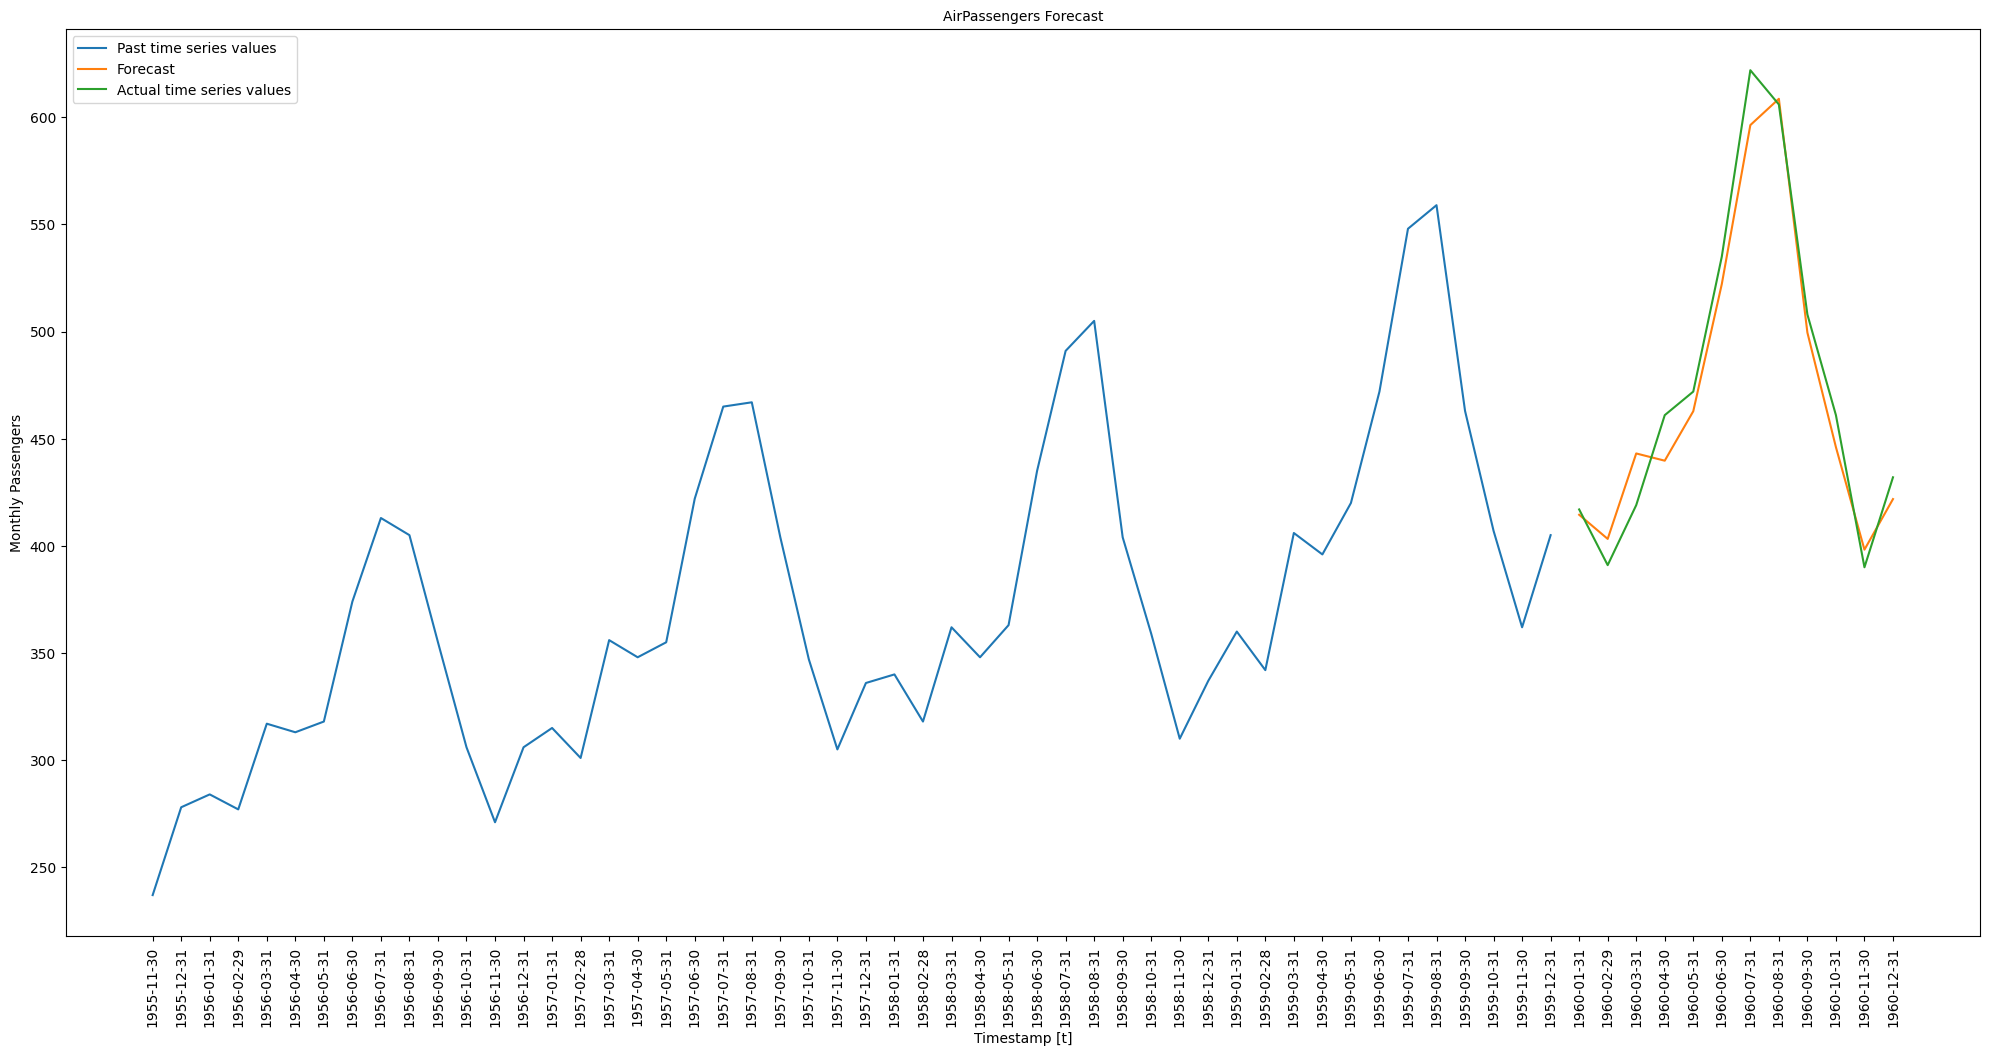

In [ ]:
Y_train_df.set_index('ds',inplace =True)
timegpt_fcst_df.set_index('ds',inplace =True)
Y_test_df.set_index('ds',inplace =True)
plt.figure(figsize=(20, 10))
y_past = Y_train_df["y"][-50:]
y_pred = timegpt_fcst_df["TimeGPT"]
y_test = Y_test_df["y"]
plt.plot(y_past, label="Past time series values")
plt.plot(timegpt_fcst_df["TimeGPT"], label="Forecast")
plt.plot(y_test, label="Actual time series values")
plt.title('AirPassengers Forecast', fontsize=10)
plt.ylabel('Monthly Passengers', fontsize=10)
plt.xlabel('Timestamp [t]', fontsize=10)
plt.tight_layout()
plt.xticks(rotation=90)
plt.legend();